## Practical Work 3

Develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [8]:
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

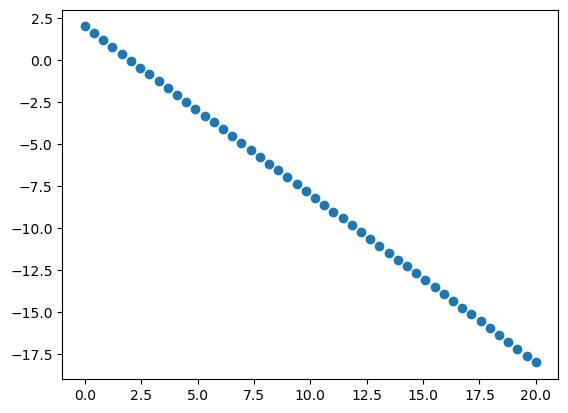

In [5]:
plt.scatter(X,y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [6]:
def gradient_desecent_single_variable(X, y, alpha, max_iter):

    theta_0 = 0
    theta_1 = 0
    m =len(y)
    stopping_threshold = 0.001
    converging_threshold = 0.001
    losses = []
    theta_0_values = []
    theta_1_values = []
    hypothesis_output = []

    for i in range(max_iter):
        theta_0_values.append(theta_0)
        theta_1_values.append(theta_1)
        predicted_y = theta_0 + theta_1 * X
        hypothesis_output.append(predicted_y)
        error_vector = predicted_y - y
        mse = np.sum(error_vector**2) / (2 * m)
        losses.append(mse)
        d_theta_0 = (1/m)*np.sum(error_vector)
        d_theta_1 = (1/m)*np.sum(error_vector*X)
        
        grad_vector = np.array([d_theta_0, d_theta_1])
        grad_vector = grad_vector.reshape(2,1)
        grad_vector_norm = np.linalg.norm(grad_vector)
        
        # if grad_norm < .001 or np.abs((loss[-2] - loss[-1])) < .001:  
        if (grad_vector_norm < stopping_threshold) or (i !=0 and (abs(losses[i-1] - mse) < converging_threshold)):
            print("****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i} epochs")
            print("\ntheta_0_optw :", theta_0)
            print("theta_1_opt :", theta_1)
            print('\nError Vector:\n', error_vector)
            print('\ncost =', mse)
            print('\nh(x) = y_predict:\n', predicted_y)
            print("\ny_actual:\n", y)
            break

        theta_0 -= alpha * d_theta_0
        theta_1 -= alpha * d_theta_1

        print(f"****************** Iteration {i} ********************\n")
        print('h(x):\n',predicted_y)
        print('\nError Vector:\n',error_vector)
        print('\nj = ',mse)
        print('\nGradient Vector:\n',grad_vector)
        print('\nGradient Vector Norm:',grad_vector_norm)
        print("\ntheta_0_new :", theta_0)
        print("theta_1_new :", theta_1)

    return theta_0_values, theta_1_values, losses, predicted_y, hypothesis_output, theta_0, theta_1

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [7]:
theta_0_values, theta_1_values, losses, predicted_y, hypothesis_output, theta_0, theta_1 = gradient_desecent_single_variable(X, y, alpha=0.0005, max_iter=300)

****************** Iteration 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm: 114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.0573

In [9]:
r2_score(y, predicted_y)

0.9686158031920962

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

In [12]:
def plot_loss(losses):
    plt.plot(losses, '-o')
    plt.grid()
    plt.show()

def plot_thetas_vs_loess(theta_0_values,theta_1_values,losses):
    plt.plot(theta_0_values, losses, '-o')
    plt.title('learning rate = 0.0005')
    plt.xlabel('Theta 0')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

    plt.plot(theta_1_values, losses, '-o')
    plt.title('Learning Rate = 0.0005')
    plt.xlabel('Theta 1')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

def regression_lines(X,y,theta_0_values,theta_1_values):
    plt.scatter(X, y, marker='o')
    for t0, t1 in zip(theta_0_values, theta_1_values):
        plt.plot(X, t0 + t1 * X, color='red')
    plt.title('Regression Lines Till Converge')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.grid()
    plt.show()
def best_regression_line(X,y,predicted_y):
    plt.scatter(X, y, marker='o')
    plt.plot(X, predicted_y, color='red', label='Best Regression Line')
    plt.title('Best Regression Line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid()
    plt.show()

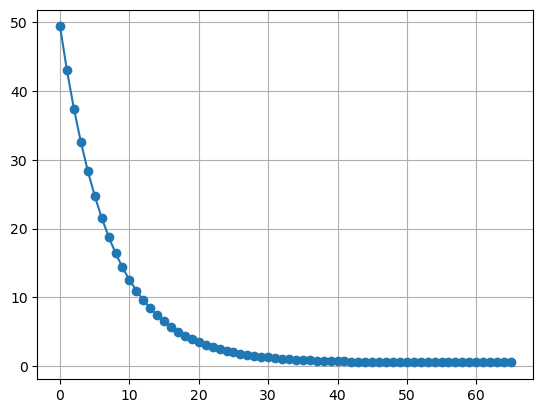

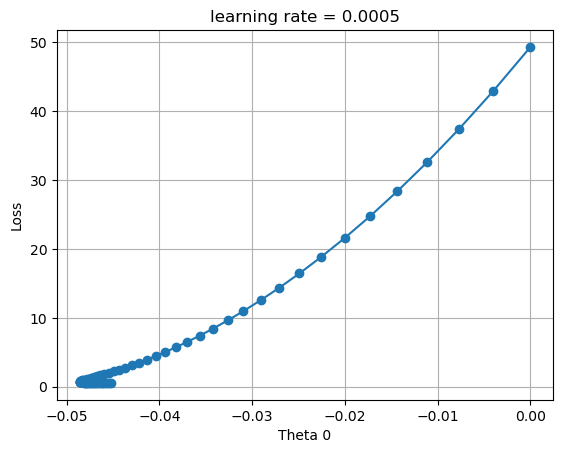

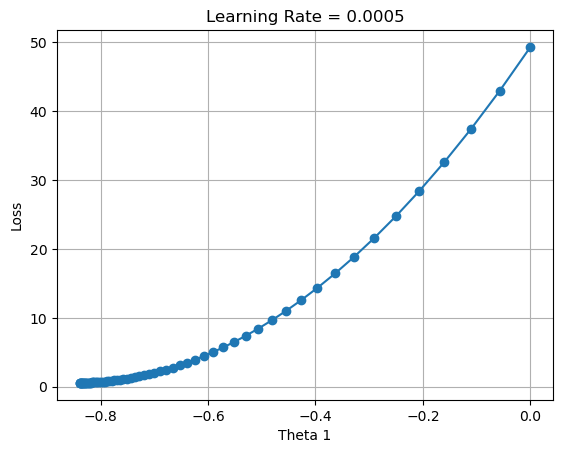

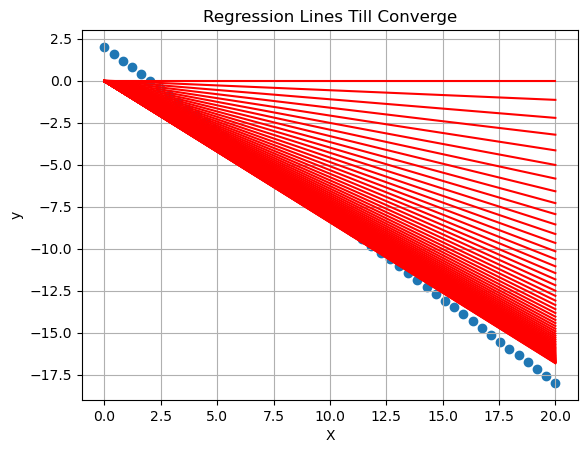

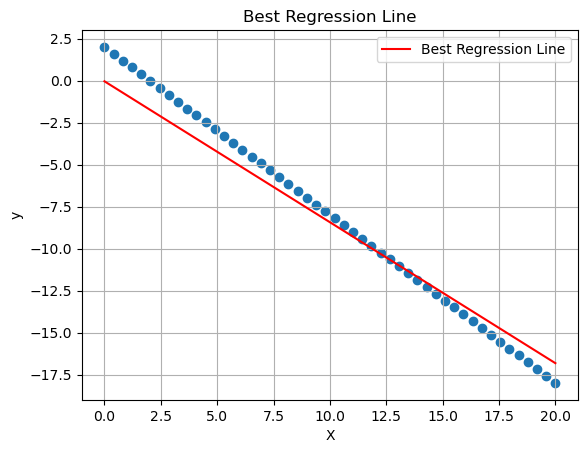

In [14]:
plot_loss(losses)
plot_thetas_vs_loess(theta_0_values,theta_1_values,losses)
regression_lines(X,y,theta_0_values,theta_1_values)
best_regression_line(X,y,predicted_y)

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [19]:
def gradient_desecent_sv_moment(X, y, alpha, gamma, max_iter):

    theta_0 = 0
    theta_1 = 0
    momentum_0 = 0
    momentum_1 = 0
    m =len(y)
    stopping_threshold = 0.001
    converging_threshold = 0.001
    losses = []
    theta_0_values = []
    theta_1_values = []
    hypothesis_output = []

    for i in range(max_iter):
        theta_0_values.append(theta_0)
        theta_1_values.append(theta_1)
        predicted_y = theta_0 + theta_1 * X
        hypothesis_output.append(predicted_y)
        error_vector = predicted_y - y
        mse = np.sum(error_vector**2) / (2 * m)
        losses.append(mse)
        d_theta_0 = (1/m)*np.sum(error_vector)
        d_theta_1 = (1/m)*np.sum(error_vector*X)
        
        grad_vector = np.array([d_theta_0, d_theta_1])
        grad_vector = grad_vector.reshape(2,1)
        grad_vector_norm = np.linalg.norm(grad_vector)
        
        if (grad_vector_norm < stopping_threshold) or (i !=0 and (abs(losses[i-1] - mse) < converging_threshold)):
            print("****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i} epochs")
            print("\ntheta_0_optw :", theta_0)
            print("theta_1_opt :", theta_1)
            print('\nError Vector:\n', error_vector)
            print('\ncost =', mse)
            print('\nh(x) = y_predict:\n', predicted_y)
            print("\ny_actual:\n", y)
            break
        
        momentum_0 = gamma * momentum_0 + alpha * d_theta_0
        momentum_1 = gamma * momentum_1 + alpha * d_theta_1

        theta_0 = theta_0 - momentum_0                   
        theta_1 = theta_1 - momentum_1 

        print(f"****************** Iteration {i} ********************\n")
        print('h(x):\n',predicted_y)
        print('\nError Vector:\n',error_vector)
        print('\nj = ',mse)
        print('\nGradient Vector:\n',grad_vector)
        print('\nGradient Vector Norm:',grad_vector_norm)
        print("\ntheta_0_new :", theta_0)
        print("theta_1_new :", theta_1)

    return theta_0_values, theta_1_values, losses, predicted_y, hypothesis_output, theta_0, theta_1

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [20]:
theta_0_values, theta_1_values, losses, predicted_y, hypothesis_output, theta_0, theta_1 = gradient_desecent_sv_moment(X, y, alpha=0.0005,gamma=0.5, max_iter=300)

****************** Iteration 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm: 114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.0573

In [21]:
r2_score(y, predicted_y)

0.9687892837396442

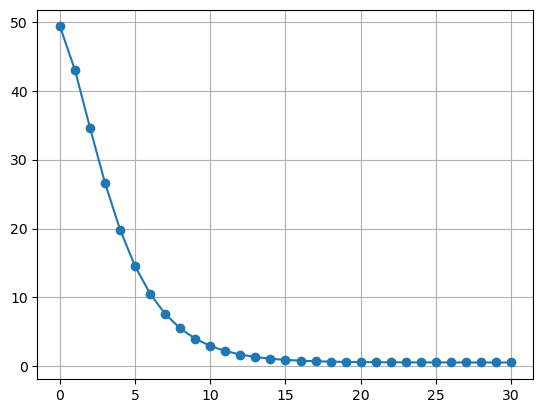

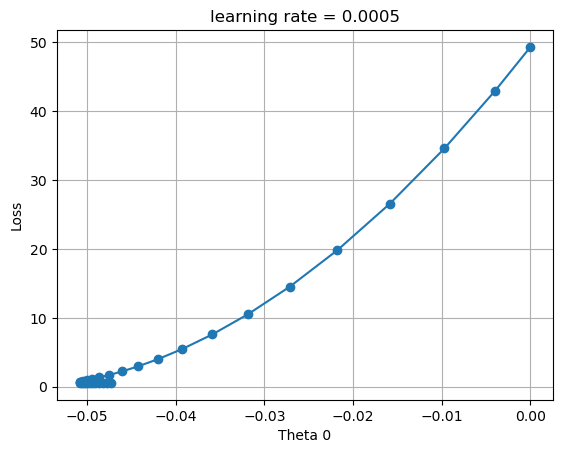

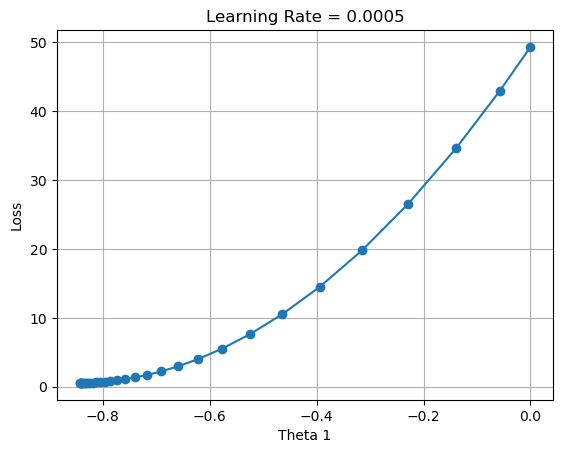

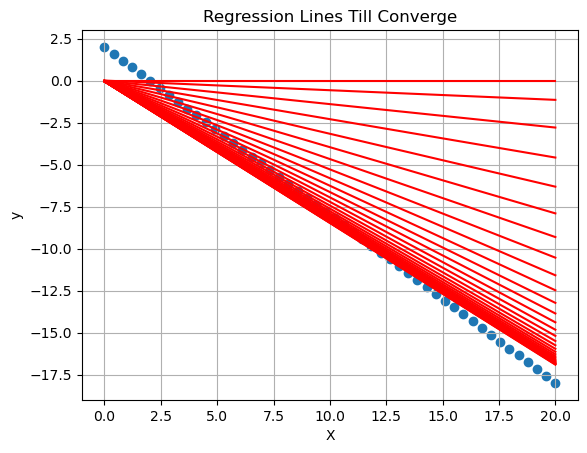

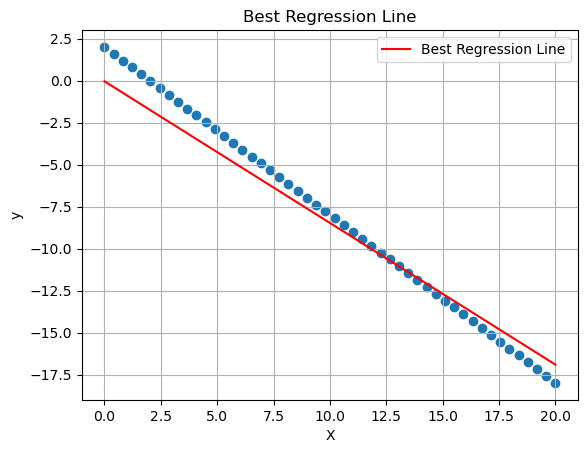

In [22]:
plot_loss(losses)
plot_thetas_vs_loess(theta_0_values,theta_1_values,losses)
regression_lines(X,y,theta_0_values,theta_1_values)
best_regression_line(X,y,predicted_y)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [23]:
theta_0_values, theta_1_values, losses, predicted_y, hypothesis_output, theta_0, theta_1 = gradient_desecent_sv_moment(X, y, alpha=0.0005,gamma=0.9, max_iter=300)

****************** Iteration 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm: 114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.0573

In [24]:
r2_score(y, predicted_y)

0.973589591111118

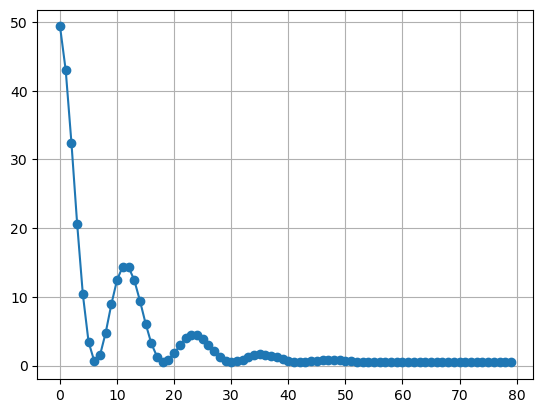

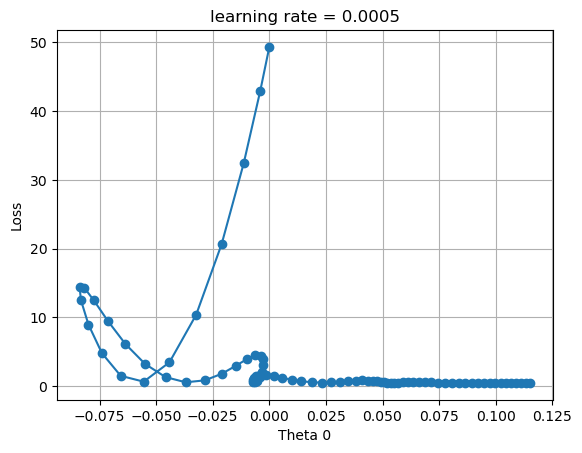

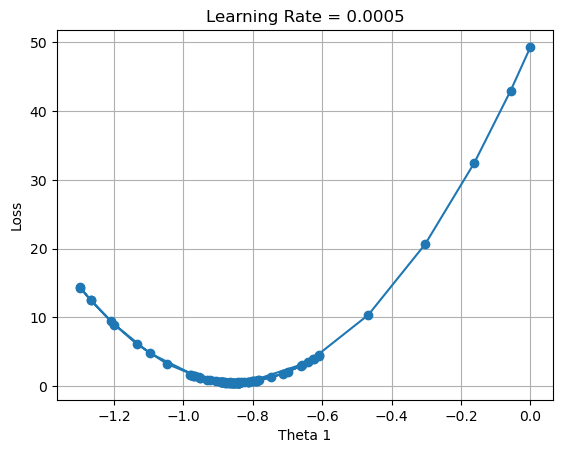

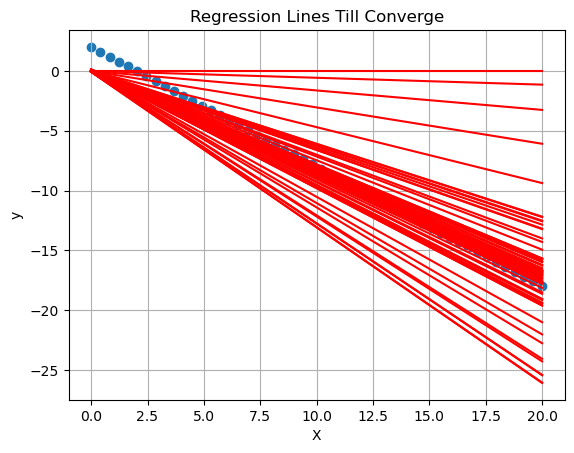

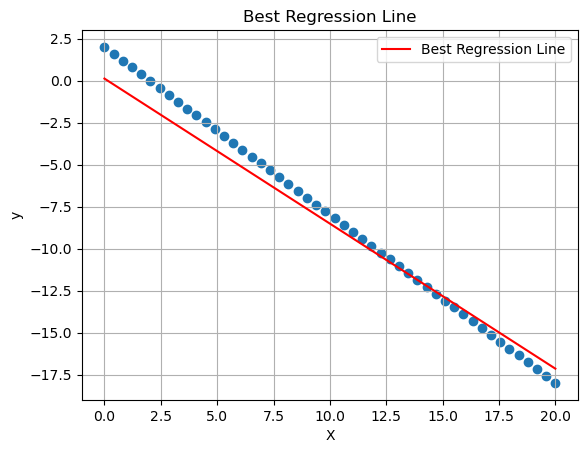

In [25]:
plot_loss(losses)
plot_thetas_vs_loess(theta_0_values,theta_1_values,losses)
regression_lines(X,y,theta_0_values,theta_1_values)
best_regression_line(X,y,predicted_y)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [26]:
theta_0_values, theta_1_values, losses, predicted_y, hypothesis_output, theta_0, theta_1 = gradient_desecent_sv_moment(X, y, alpha=0.0005,gamma=0.89, max_iter=300)

****************** Iteration 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm: 114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.0573

In [27]:
r2_score(y,predicted_y)

0.972435565060376

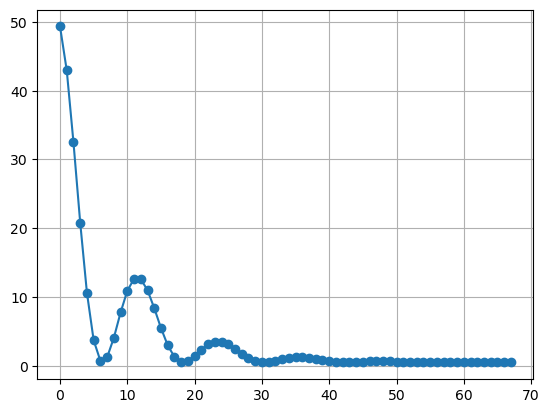

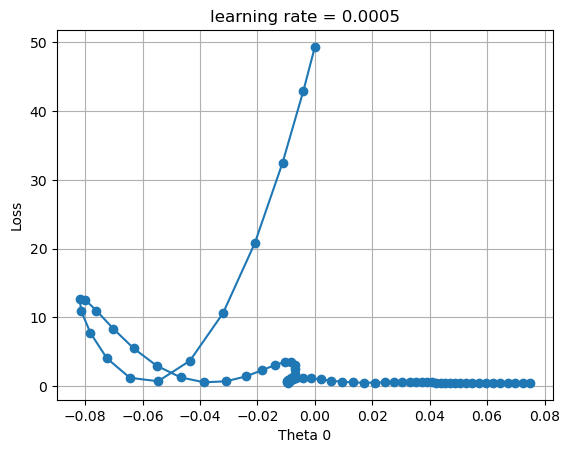

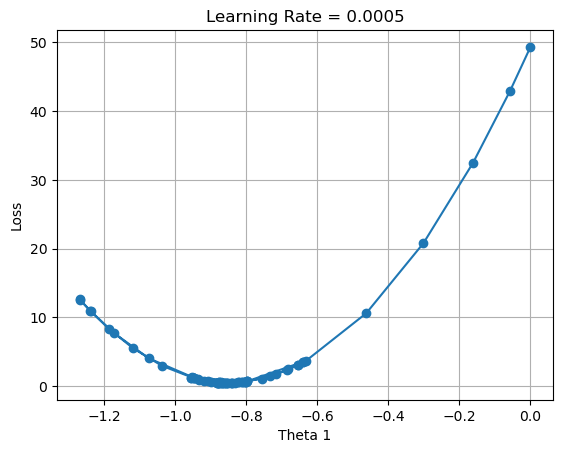

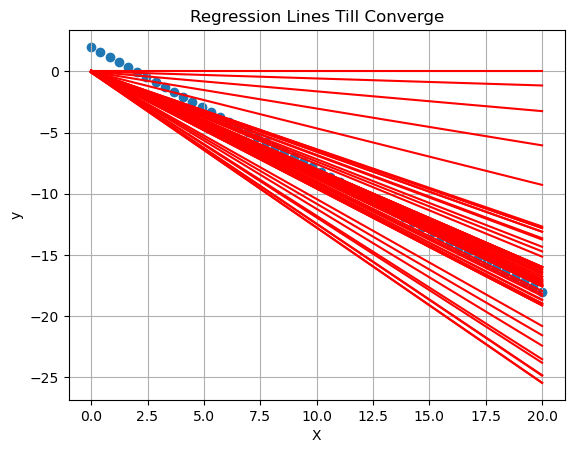

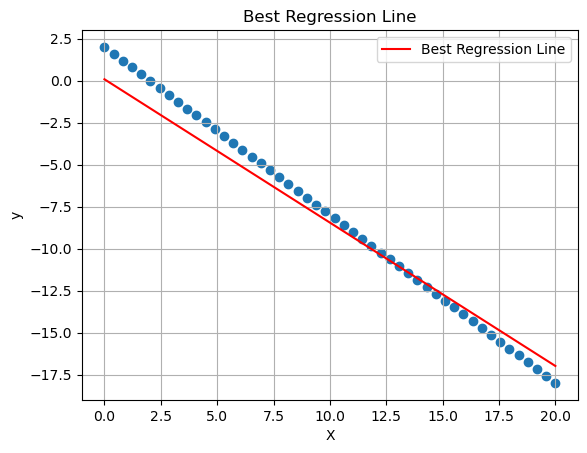

In [28]:
plot_loss(losses)
plot_thetas_vs_loess(theta_0_values,theta_1_values,losses)
regression_lines(X,y,theta_0_values,theta_1_values)
best_regression_line(X,y,predicted_y)

### Do not forget:

#### Try another values of momentum term and check your results.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [29]:
theta_0_values, theta_1_values, losses, predicted_y, hypothesis_output, theta_0, theta_1 = gradient_desecent_sv_moment(X, y, alpha=0.0005,gamma=0, max_iter=300)

****************** Iteration 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm: 114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.0573

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [30]:
def gradient_desecent_sv_moment(X, y, alpha, gamma, max_iter):

    theta_0 = 0
    theta_1 = 0
    v_0 = 0
    v_1 = 0
    m =len(y)
    stopping_threshold = 0.001
    converging_threshold = 0.001
    losses = []
    theta_0_values = []
    theta_1_values = []
    hypothesis_output = []

    for i in range(max_iter):
        theta_0_values.append(theta_0)
        theta_1_values.append(theta_1)
        predicted_y = theta_0 + theta_1 * X
        hypothesis_output.append(predicted_y)
        error_vector = predicted_y - y
        mse = np.sum(error_vector**2) / (2 * m)
        losses.append(mse)
        d_theta_0 = (1/m)*np.sum(error_vector)
        d_theta_1 = (1/m)*np.sum(error_vector*X)
        
        grad_vector = np.array([d_theta_0, d_theta_1])
        grad_vector = grad_vector.reshape(2,1)
        grad_vector_norm = np.linalg.norm(grad_vector)
        
        if (grad_vector_norm < stopping_threshold) or (i !=0 and (abs(losses[i-1] - mse) < converging_threshold)):
            print("****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i} epochs")
            print("\ntheta_0_optw :", theta_0)
            print("theta_1_opt :", theta_1)
            print('\nError Vector:\n', error_vector)
            print('\ncost =', mse)
            print('\nh(x) = y_predict:\n', predicted_y)
            print("\ny_actual:\n", y)
            break
        
        theta_tmp_0  = theta_0 - gamma * v_0
        theta_tmp_1  = theta_1 - gamma * v_1

        h_temp = theta_tmp_0 + theta_tmp_1 * X

        d_theta_tmp_0 = np.sum(h_temp - y) / m
        d_theta_tmp_1 = (np.sum((h_temp - y) * X))/ m

        v_0 = gamma * v_0 + alpha * d_theta_tmp_0
        v_1 = gamma * v_1 + alpha * d_theta_tmp_1

        theta_0 = theta_tmp_0 - alpha * d_theta_tmp_0                      
        theta_1 = theta_tmp_1 - alpha * d_theta_tmp_1                               

        print(f"****************** Iteration {i} ********************\n")
        print('h(x):\n',predicted_y)
        print('\nError Vector:\n',error_vector)
        print('\nj = ',mse)
        print('\nGradient Vector:\n',grad_vector)
        print('\nGradient Vector Norm:',grad_vector_norm)
        print("\ntheta_0_new :", theta_0)
        print("theta_1_new :", theta_1)

    return theta_0_values, theta_1_values, losses, predicted_y, hypothesis_output, theta_0, theta_1

In [31]:
theta_0_values, theta_1_values, losses, predicted_y, hypothesis_output, theta_0, theta_1 = gradient_desecent_sv_moment(X, y, alpha=0.0005,gamma=0.9, max_iter=300)

****************** Iteration 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm: 114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.0573

In [32]:
r2_score(y,predicted_y)

0.971103130756324

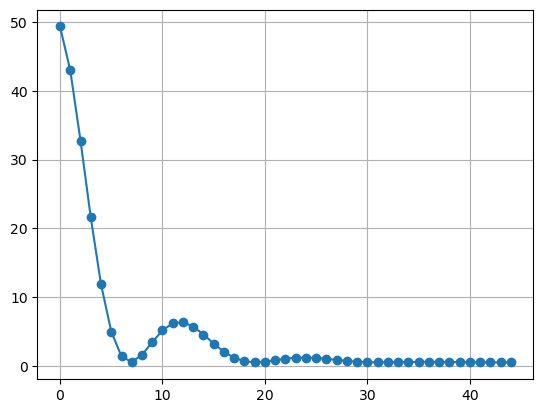

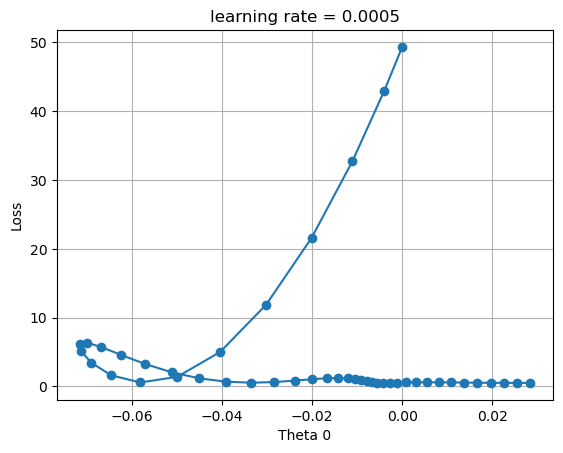

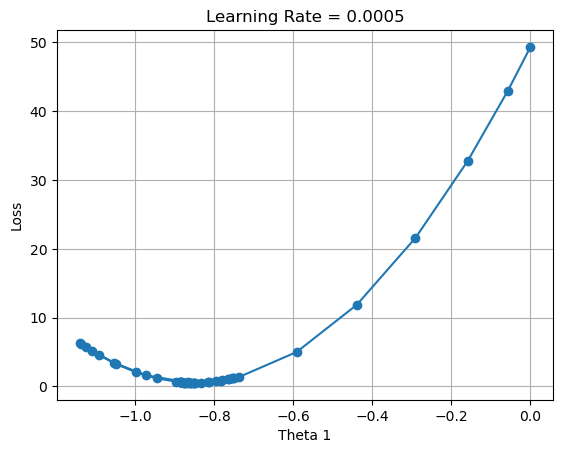

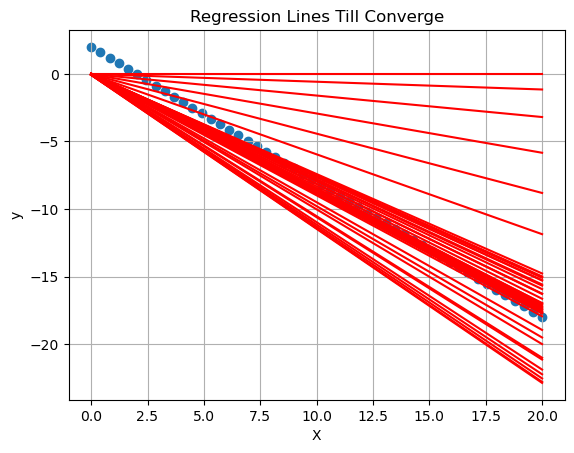

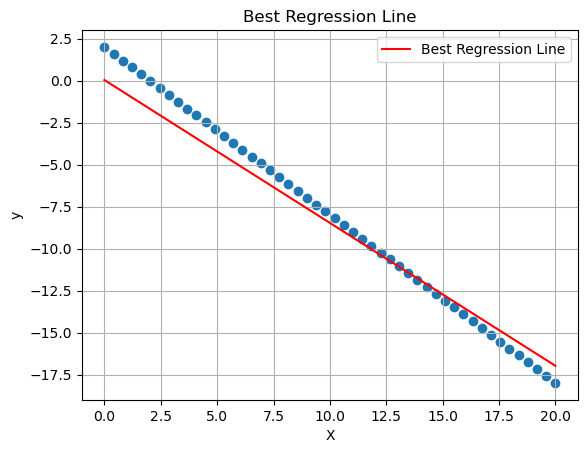

In [33]:
plot_loss(losses)
plot_thetas_vs_loess(theta_0_values,theta_1_values,losses)
regression_lines(X,y,theta_0_values,theta_1_values)
best_regression_line(X,y,predicted_y)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [34]:
theta_0_values, theta_1_values, losses, predicted_y, hypothesis_output, theta_0, theta_1 = gradient_desecent_sv_moment(X, y, alpha=0.0005,gamma=0.89, max_iter=300)

****************** Iteration 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm: 114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.0573

In [35]:
r2_score(y, predicted_y)

0.9699718983158406

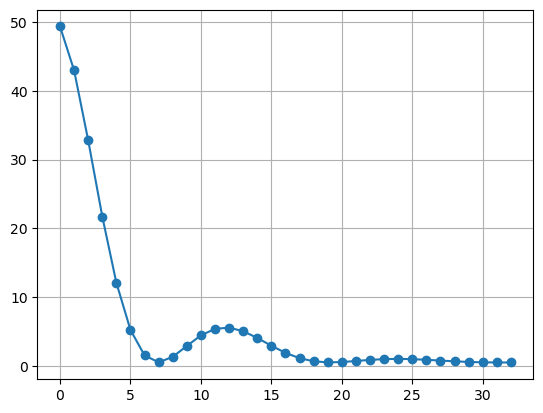

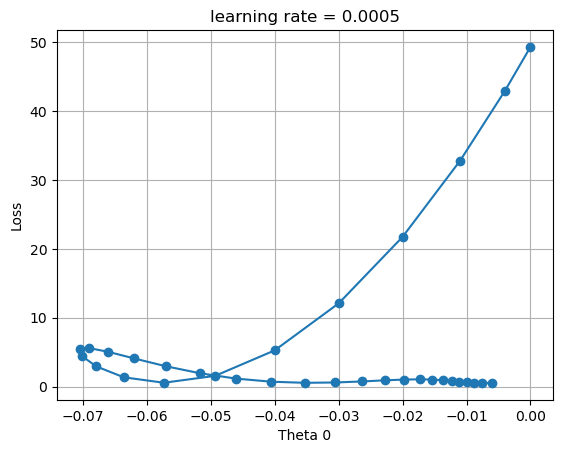

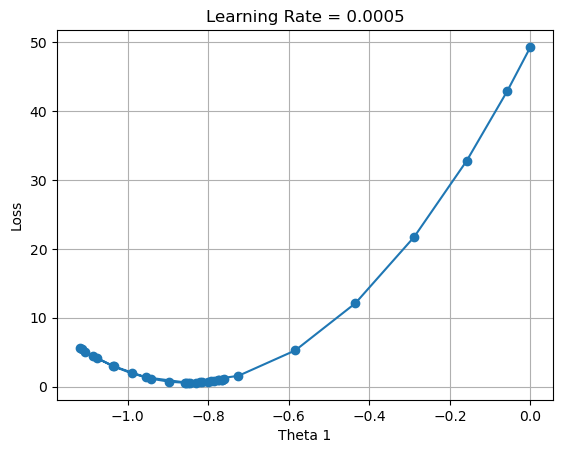

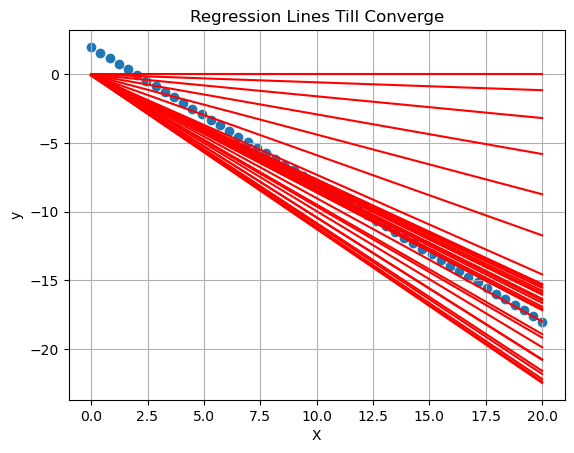

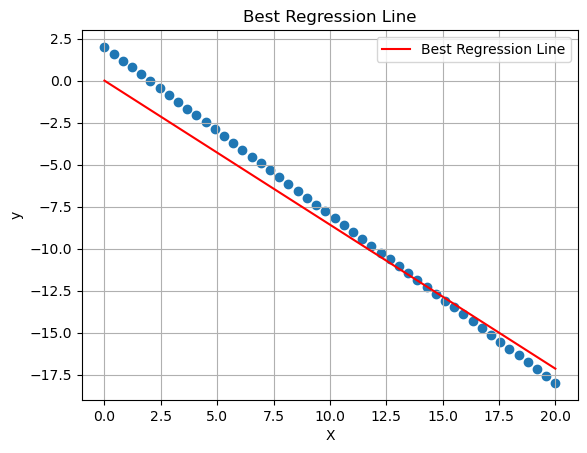

In [36]:
plot_loss(losses)
plot_thetas_vs_loess(theta_0_values,theta_1_values,losses)
regression_lines(X,y,theta_0_values,theta_1_values)
best_regression_line(X,y,predicted_y)